<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [19]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [20]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [21]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [22]:

# TASK 1: Dataset Overview
print("Dataset Info:")
boston_df.info()
print("\nSummary Statistics:")
print(boston_df.describe())
print("\nMissing Values:")
print(boston_df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB

Summary Statistics:
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.

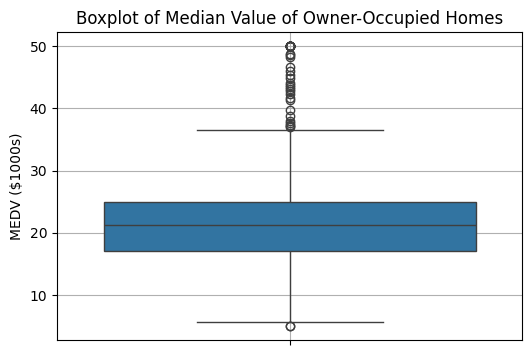

In [23]:
# TASK 2: Visualizations
# 1. Boxplot for MEDV
plt.figure(figsize=(6, 4))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("MEDV ($1000s)")
plt.grid(True)
plt.show()

<ipython-input-24-7322bb47ca25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAS', data=boston_df, palette='pastel')


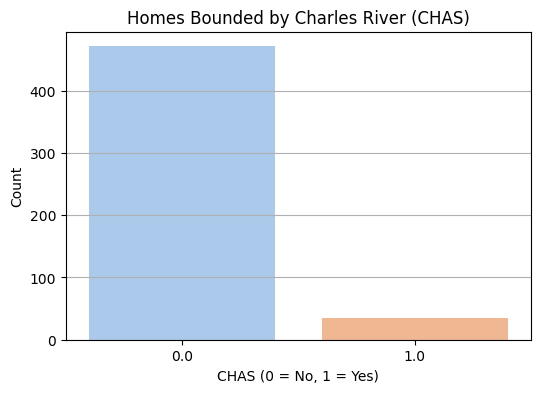

In [24]:
# 2. Bar plot for CHAS
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df, palette='pastel')
plt.title("Homes Bounded by Charles River (CHAS)")
plt.xlabel("CHAS (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

<ipython-input-25-1a05bd35e9b1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='Set2')


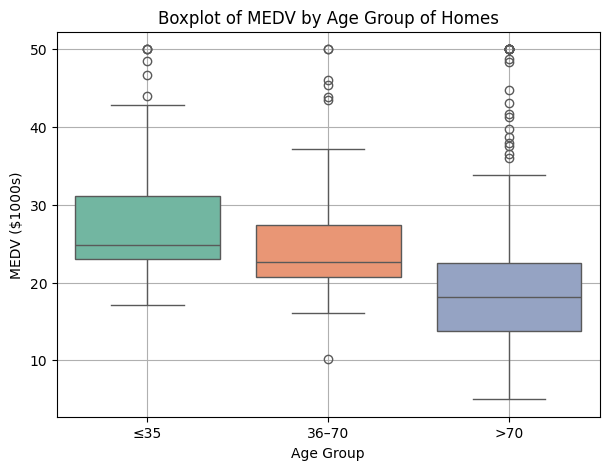

In [25]:
# 3. Boxplot of MEDV vs AGE group
bins = [0, 35, 70, 100]
labels = ['≤35', '36–70', '>70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(7, 5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='Set2')
plt.title("Boxplot of MEDV by Age Group of Homes")
plt.xlabel("Age Group")
plt.ylabel("MEDV ($1000s)")
plt.grid(True)
plt.show()

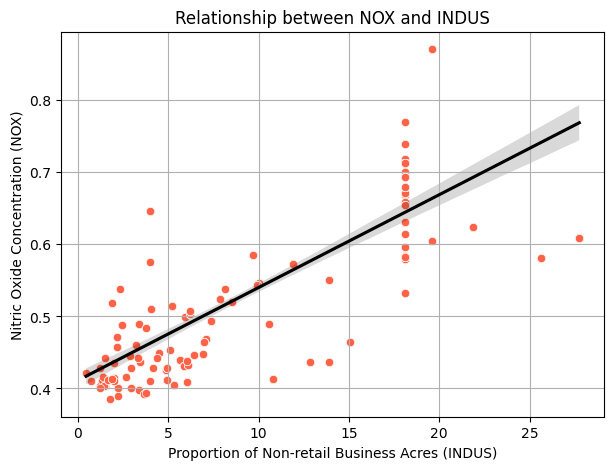

In [26]:
# 4. Scatter plot: NOX vs INDUS
plt.figure(figsize=(7, 5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='tomato')
sns.regplot(x='INDUS', y='NOX', data=boston_df, scatter=False, color='black')
plt.title("Relationship between NOX and INDUS")
plt.xlabel("Proportion of Non-retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.grid(True)
plt.show()

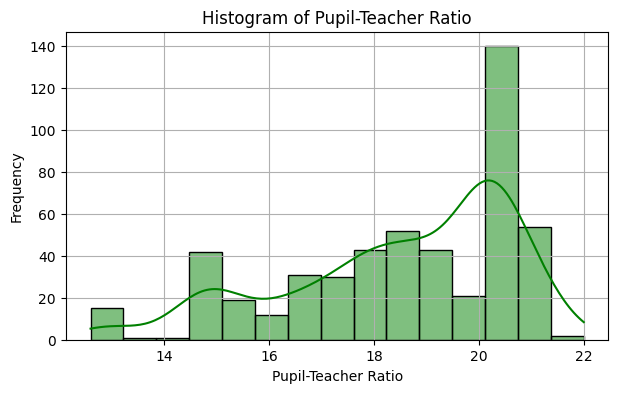

In [27]:
# 5. Histogram: PTRATIO
plt.figure(figsize=(7, 4))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True, color='green')
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [28]:
# TASK 3: Statistical Tests

# 1. T-test: CHAS vs MEDV
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_val = stats.ttest_ind(chas1, chas0, equal_var=False)
print("\nT-test: MEDV by CHAS")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Conclusion: Significant difference in MEDV based on Charles River proximity.")
else:
    print("Conclusion: No significant difference in MEDV based on Charles River proximity.")


T-test: MEDV by CHAS
T-statistic: 3.1133, P-value: 0.0036
Conclusion: Significant difference in MEDV based on Charles River proximity.


In [30]:
# 2. ANOVA: MEDV vs AGE groups
group1 = boston_df[boston_df['AGE_GROUP'] == '≤35']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '36–70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV']
f_stat, p_val_anova = stats.f_oneway(group1, group2, group3)
print("\nANOVA: MEDV by AGE Group")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val_anova:.4f}")
if p_val_anova < 0.05:
    print("Conclusion: Significant difference in MEDV across AGE groups.")
else:
    print("Conclusion: No significant difference in MEDV across AGE groups.")



ANOVA: MEDV by AGE Group
F-statistic: 36.4076, P-value: 0.0000
Conclusion: Significant difference in MEDV across AGE groups.


In [31]:
# 3. Pearson Correlation: NOX vs INDUS
corr, p_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nCorrelation: NOX vs INDUS")
print(f"Correlation coefficient: {corr:.4f}, P-value: {p_corr:.4f}")
if p_corr < 0.05:
    print("Conclusion: Significant correlation between NOX and INDUS.")
else:
    print("Conclusion: No significant correlation between NOX and INDUS.")


Correlation: NOX vs INDUS
Correlation coefficient: 0.7637, P-value: 0.0000
Conclusion: Significant correlation between NOX and INDUS.


In [33]:
# 4. Regression: MEDV ~ DIS
model = ols("MEDV ~ DIS", data=boston_df).fit()
print("\nRegression Analysis: MEDV vs DIS")
print(model.summary())
if model.pvalues['DIS'] < 0.05:
    print("Conclusion: Weighted distance (DIS) has a significant impact on MEDV.")
else:
    print("Conclusion: Weighted distance (DIS) does not significantly impact MEDV.")



Regression Analysis: MEDV vs DIS
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.21e-08
Time:                        00:42:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3